In [16]:
from py2neo import Graph, NodeSelector
from pandas import DataFrame
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker, style, dates

style.use('ggplot')

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

graph = Graph("http://localhost:7474", password = "admin")

In [2]:
data1 = DataFrame(graph.data("MATCH (s:Smlouva) RETURN s.politici,s.chyba_identifikace_smluvni_strany,s.chyba_chybne_strany_smlouvy,s.chyba_stejne_strany_smlouvy,s.chyba_neexistujici_ico,s.chyba_vadne_ico,\
                                                      s.chyba_smlouva_uzavrena_s_nespolehlivym_platcem_dph,s.chyba_firma_vznikla_az_po_podpisu_smlouvy,s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy,\
                                                      s.chyba_budouci_datum_uzavreni,s.chyba_neplatny_datum_uzavreni_smlouvy,s.chyba_nulova_hodnota_smlouvy,s.chyba_neplatna_cena,s.chyba_zaporna_cena_bez_dph,\
                                                      s.chyba_zaporna_cena_s_dph,s.chyba_bez_dph_s_dph,s.chyba_chybi_predmet_smlouvy,s.chyba_necitelnost_smlouvy"))

In [3]:
data1.sum()

s.chyba_bez_dph_s_dph                                    57393
s.chyba_budouci_datum_uzavreni                            3221
s.chyba_chybi_predmet_smlouvy                              315
s.chyba_chybne_strany_smlouvy                             7086
s.chyba_firma_vznikla_az_po_podpisu_smlouvy               3117
s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy        1966
s.chyba_identifikace_smluvni_strany                     125748
s.chyba_necitelnost_smlouvy                              74245
s.chyba_neexistujici_ico                                  1515
s.chyba_neplatna_cena                                    43166
s.chyba_neplatny_datum_uzavreni_smlouvy                   2667
s.chyba_nulova_hodnota_smlouvy                          205872
s.chyba_smlouva_uzavrena_s_nespolehlivym_platcem_dph         9
s.chyba_stejne_strany_smlouvy                            16918
s.chyba_vadne_ico                                          560
s.chyba_zaporna_cena_bez_dph                           

In [4]:
graph.data("MATCH (s:Smlouva) WHERE s.chyba_identifikace_smluvni_strany=true OR s.chyba_chybne_strany_smlouvy=true OR s.chyba_stejne_strany_smlouvy=true OR s.chyba_neexistujici_ico=true OR s.chyba_vadne_ico=true OR \
                                                      s.chyba_smlouva_uzavrena_s_nespolehlivym_platcem_dph=true OR s.chyba_firma_vznikla_az_po_podpisu_smlouvy=true OR s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy=true OR \
                                                      s.chyba_budouci_datum_uzavreni=true OR s.chyba_neplatny_datum_uzavreni_smlouvy=true OR s.chyba_nulova_hodnota_smlouvy=true OR s.chyba_neplatna_cena=true OR s.chyba_zaporna_cena_bez_dph=true OR \
                                                      s.chyba_zaporna_cena_s_dph=true OR s.chyba_bez_dph_s_dph=true OR s.chyba_chybi_predmet_smlouvy=true OR s.chyba_necitelnost_smlouvy=true RETURN count(distinct(s))")

[{'count(distinct(s))': 412282}]

In [5]:
graph.data("MATCH (s:Smlouva) RETURN count(s)")

[{'count(s)': 983061}]

In [6]:
data_pocty_s_chybou = DataFrame(graph.data("MATCH (s:Smlouva) WHERE s.chyba_identifikace_smluvni_strany=true OR s.chyba_chybne_strany_smlouvy=true OR s.chyba_stejne_strany_smlouvy=true OR s.chyba_neexistujici_ico=true OR s.chyba_vadne_ico=true OR \
                                                      s.chyba_smlouva_uzavrena_s_nespolehlivym_platcem_dph=true OR s.chyba_firma_vznikla_az_po_podpisu_smlouvy=true OR s.chyba_firma_vznikla_kratce_pred_podpisem_smlouvy=true OR \
                                                      s.chyba_budouci_datum_uzavreni=true OR s.chyba_neplatny_datum_uzavreni_smlouvy=true OR s.chyba_nulova_hodnota_smlouvy=true OR s.chyba_neplatna_cena=true OR s.chyba_zaporna_cena_bez_dph=true OR \
                                                      s.chyba_zaporna_cena_s_dph=true OR s.chyba_bez_dph_s_dph=true OR s.chyba_chybi_predmet_smlouvy=true OR s.chyba_necitelnost_smlouvy=true WITH substring(s.cas_zverejneni,0,7) as datum, count(s) as pocet RETURN datum, pocet"))

In [7]:
data_pocty_celkem = DataFrame(graph.data("MATCH (s:Smlouva) WITH substring(s.cas_zverejneni,0,7) as datum, count(s) as pocet RETURN datum, pocet"))

In [8]:
data_pocty_s_chybou = data_pocty_s_chybou.sort_values("datum").set_index("datum").rename(columns={"pocet": "chyby"})

In [9]:
data_pocty_celkem = data_pocty_celkem.sort_values("datum").set_index("datum")

In [10]:
data = data_pocty_s_chybou.join(data_pocty_celkem)
data['podil'] = data['chyby'] / data['pocet']
data['datum'] = data.index
data['datum2'] = data.index.str.replace("-", "\n")

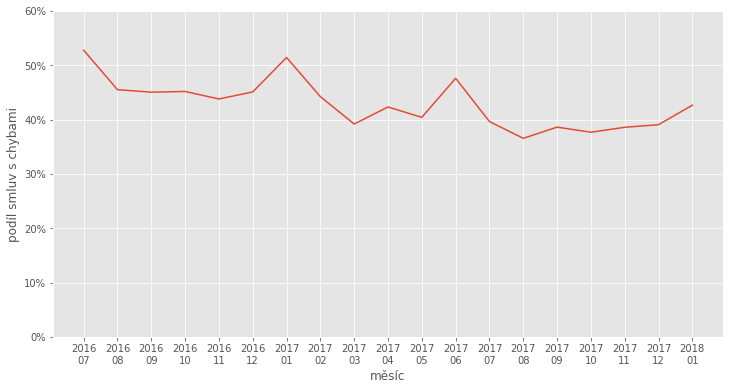

In [17]:
fig, axes = plt.subplots()
axes.set_xlabel("měsíc")
axes.set_ylabel("podíl smluv s chybami")
axes.set_ylim([0,0.6])
axes.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
axes.plot(data["datum2"], data["podil"])
fig.savefig("vystup/chyby.pdf", bbox_inches='tight')

In [12]:
data_pred = data.loc[data['datum'] < '2017-07']

In [13]:
data_po = data.loc[data['datum'] >= '2017-07']

In [14]:
data_pred["podil"].mean()

0.45242413819125304

In [15]:
data_po["podil"].mean()

0.38999459861848057